# In Depth Linear Regression

# first round

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [5]:
x = 10*np.random.rand(50)
y = 2*x - 5 +np.random.rand(50)

(-0.03998653186488221,
 10.251178765839027,
 -4.8069707090340525,
 15.66830563572503)

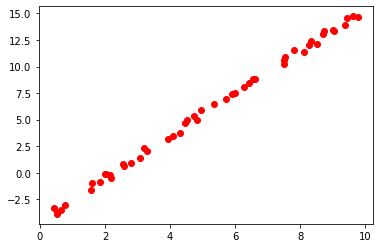

In [6]:
plt.scatter(x, y, facecolor='red')
plt.axis('tight')

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
x_test = np.linspace(0,10, 1000)

In [9]:
y_model = model.fit(x[:, None], y).predict(x_test[:, None])

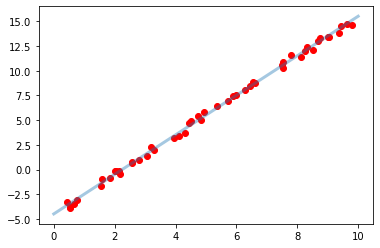

In [10]:
plt.scatter(x, y, facecolor='red')
plt.plot(x_test, y_model, linewidth=3, alpha=0.4)

In [11]:
model.intercept_

-4.4984504356016695

In [12]:
model.coef_

array([2.00234498])

In [13]:
model=LinearRegression(fit_intercept=True)

In [14]:
x1 = 10*np.random.rand(50, 3)
y1 = 0.5 + np.dot(x1, [2, -2, 1])

In [15]:
np.dot([[1, -1, 1],
        [2, -2, 1]],
       [1, 1, 2])

array([2, 2])

In [16]:
x1.shape

(50, 3)

In [17]:
y1.shape

(50,)

In [18]:
model.fit(x1,y1)

LinearRegression()

In [19]:
model.coef_

array([ 2., -2.,  1.])

### Polynomial basis functions

In [20]:
x3 =np.array([2,3,4])

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
model2 = PolynomialFeatures(degree=5, include_bias=True)

In [23]:
model2.fit_transform(x3[:,None])

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01, 2.430e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02, 1.024e+03]])

In [24]:
from sklearn.pipeline import make_pipeline

In [25]:
poly = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())

In [26]:
x = np.random.rand(50) *10
y = np.sin(x)+0.1*np.random.rand(50)

In [27]:
x.shape

(50,)

In [28]:
y.shape

(50,)

In [26]:
x_test = np.linspace(0, 10, 1000)

In [27]:
y_model = poly.fit(x[:,None], y).predict(x_test[:, None])

In [28]:
poly.steps[1][1].coef_

array([ 0.00000000e+00,  6.38979496e-01,  1.10939626e+00, -1.40527795e+00,
        7.06607140e-01, -2.28419367e-01,  4.98380304e-02, -6.97371318e-03,
        5.88938773e-04, -2.72217229e-05,  5.29022290e-07])

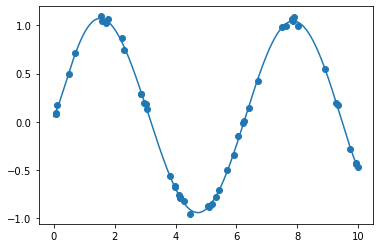

In [29]:
plt.scatter(x, y)
plt.plot(x_test, y_model)

## Gaussian basis functions

In [30]:
x3 =np.array([2,3,4])

In [31]:
GaussianFeatures(5).fit_transform(x3[:,None])

array([[1.        , 0.8824969 , 0.60653066, 0.32465247, 0.13533528],
       [0.60653066, 0.8824969 , 1.        , 0.8824969 , 0.60653066],
       [0.13533528, 0.32465247, 0.60653066, 0.8824969 , 1.        ]])

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin 
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0): 
        self.N = N 
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width 
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
    # create N centers spread along the data range 
        self.centers_ = np.linspace(X.min(), X.max(), self.N) 
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0]) 
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)



In [33]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression()) 
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(x_test[:, np.newaxis])

In [34]:
x = np.random.rand(50) *10
y = np.sin(x)+0.1*np.random.rand(50)

(0.0, 10.0)

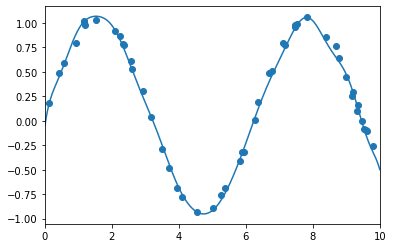

In [35]:
plt.scatter(x, y)
plt.plot(x_test, yfit)
plt.xlim(0,10)

In [36]:
gauss_model.steps[0][1].centers_

array([0.07695106, 0.59859751, 1.12024395, 1.6418904 , 2.16353685,
       2.68518329, 3.20682974, 3.72847619, 4.25012263, 4.77176908,
       5.29341553, 5.81506197, 6.33670842, 6.85835487, 7.38000131,
       7.90164776, 8.42329421, 8.94494065, 9.4665871 , 9.98823355])

In [37]:
gauss_model.steps[1][1].coef_

array([   690.68246375,  -2224.9503823 ,   4636.37851544,  -7234.14796621,
         9563.9361845 , -10919.72618014,  11177.46958147, -10115.12146454,
         8068.30895708,  -5155.7263737 ,   1907.85770172,   1461.27647064,
        -4379.47267727,   6630.37764607,  -7705.56671121,   7606.07879468,
        -6254.62163378,   4263.67648851,  -2132.48259051,    680.21209903])

In [38]:
gauss_model2 = make_pipeline(GaussianFeatures(2), LinearRegression())

In [39]:
x = np.array([1, 2, 3, 4, 5, 4, 3])
y = np.array([4, 2, 1, 3, 7, 6, 5])

In [40]:
y_m = gauss_model2.fit(x[:, None], y).predict(x[:,None])

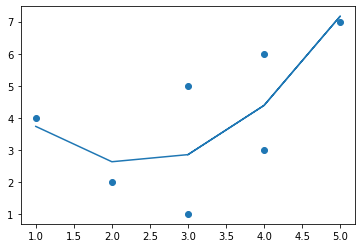

In [41]:
plt.scatter(x,y)
plt.plot(x, y_m)

In [42]:
gauss_model2.steps[0][1].centers_

array([1., 5.])

In [43]:
gauss_model2.steps[1][1].coef_

array([-61.0645082 , -31.81085716])

# Regularization

In [44]:
x = np.random.rand(50) *10
y = np.sin(x)+0.1*np.random.rand(50)

In [45]:
new_model = make_pipeline(GaussianFeatures(30), LinearRegression())

In [46]:
y_test = np.linspace(0, 10, 1000)
y_test = new_model.fit(x[:,None], y).predict(x_test[:, None])

(-1.5, 1.5)

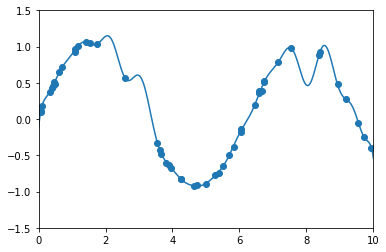

In [47]:
plt.scatter(x, y)
plt.plot(x_test, y_test)
plt.xlim(0,10)
plt.ylim(-1.5, 1.5)

In [48]:
new_model = make_pipeline(GaussianFeatures(30), LinearRegression())

In [49]:
x = np.random.rand(50) *10
y = np.sin(x)+0.1*np.random.rand(50)

In [50]:
def plot_figures(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:,None], y)
    x_test = np.linspace(0, 10, 1000)
    y_test = new_model.fit(x[:,None], y).predict(x_test[:, None])
    ax[0].scatter(x, y)
    ax[0].plot(x_test,y_test)
    ax[0].set(xlim=(0,10), xlabel='x', ylabel='y')
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlim=(0,10),xlabel='basis location', ylabel='Coefficients')

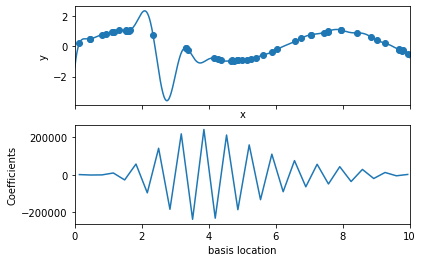

In [51]:
plot_figures(new_model)

### Ridge regression (L 2 regularization)

In [52]:
from sklearn.linear_model import Ridge

In [53]:
modela = make_pipeline(GaussianFeatures(20), Ridge(alpha=0.05))

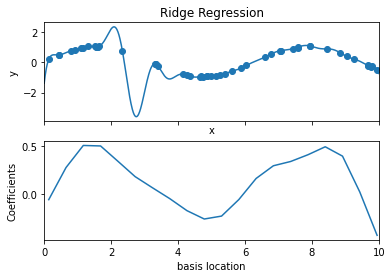

In [54]:
plot_figures(modela, title='Ridge Regression')

### Ridge regression (L 2 regularization)

In [55]:
from sklearn.linear_model import Lasso

In [56]:
modelb = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.0004))

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004717337559222344, tolerance: 0.0028227670432305983
  model = cd_fast.enet_coordinate_descent(


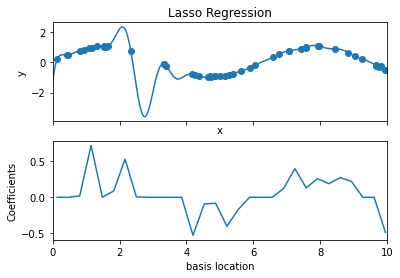

In [57]:
plot_figures(modelb, title='Lasso Regression')

# Example: Predicting Bicycle Traffic

In [58]:
counts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
counts

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2022-03-31 19:00:00,136.0,45.0,91.0
2022-03-31 20:00:00,94.0,35.0,59.0
2022-03-31 21:00:00,48.0,26.0,22.0


In [59]:
daily = counts.resample('d').aggregate(np.sum)

In [61]:
counts.index.dayofweek

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=149438)

In [62]:
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0
...,...,...,...
2022-03-27,2369.0,1059.0,1310.0
2022-03-28,2010.0,766.0,1244.0
2022-03-29,2856.0,1177.0,1679.0


In [63]:
daily['Total']=daily.sum(axis=1)

In [64]:
daily = daily[['Total']]

In [65]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_1088/4164828505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)


In [66]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-03-27,4738.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-03-28,4020.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-29,5712.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
from pandas.tseries.holiday import USFederalHolidayCalendar 
cal = USFederalHolidayCalendar()

In [68]:
holidays = cal.holidays('2012', '2016')

In [69]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'), how='left')

In [70]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-27,4738.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2022-03-28,4020.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2022-03-29,5712.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


In [71]:
daily['holiday'].fillna(0, inplace=True)

In [72]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-27,4738.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2022-03-28,4020.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-29,5712.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
daily.query('holiday==1')

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,predicted
Date,,,,,,,,,,
2012-10-08,14148.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6904.258584
2012-11-12,6524.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6904.258584
2012-11-22,2216.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6929.109148
2012-12-25,392.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7529.647822
2013-01-01,2712.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7529.647822
2013-01-21,5104.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6904.258584
2013-02-18,5924.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6904.258584
2013-05-27,3076.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6904.258584
2013-07-04,14996.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6929.109148


In [73]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday']

In [75]:
X = daily[column_names]

y = daily['Total']
X = daily[column_names]

y = daily['Total']

In [76]:
model = LinearRegression(fit_intercept=False) 
model.fit(X, y)
daily['predicted'] = model.predict(X)

<AxesSubplot:xlabel='Date'>

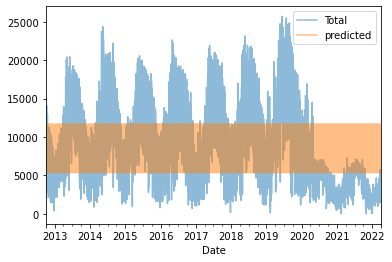

In [77]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [79]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon        11044.413722
Tue        11669.802960
Wed        11622.839648
Thu        11069.264286
Fri        10008.801254
Sat         5628.488889
Sun         5375.450505
holiday    -4140.155138
dtype: float64

In [80]:
from sklearn.utils import resample

np.random.seed(1) 
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

In [81]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

          effect  error
Mon      11044.0  253.0
Tue      11670.0  272.0
Wed      11623.0  262.0
Thu      11069.0  260.0
Fri      10009.0  232.0
Sat       5628.0  136.0
Sun       5375.0  134.0
holiday  -4140.0  830.0
